In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, RobustScaler, TargetEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.svm import SVR

In [2]:
df=pd.read_csv("Data_Train.csv")

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.shape

(10683, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
for i in df.columns:
    print(i,"-->",df[i].nunique())

Airline --> 12
Date_of_Journey --> 44
Source --> 5
Destination --> 6
Route --> 128
Dep_Time --> 222
Arrival_Time --> 1343
Duration --> 368
Total_Stops --> 5
Additional_Info --> 10
Price --> 1870


In [7]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [8]:
df.drop(['Route','Additional_Info'],axis=1,inplace=True)
    

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Price            10683 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 751.3+ KB


In [10]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [11]:
df=df.dropna(axis=0)

In [12]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [13]:
df['Total_Stops']=df['Total_Stops'].replace({
    'non-stop':0,
    '1 stop':1,
    '2 stops':2,
    '3 stops':3,
    '4 stops':4
    
})

C:\Users\tscha\AppData\Local\Temp\ipykernel_14316\3569783966.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Total_Stops']=df['Total_Stops'].replace({


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Dep_Time         10682 non-null  object
 5   Arrival_Time     10682 non-null  object
 6   Duration         10682 non-null  object
 7   Total_Stops      10682 non-null  int64 
 8   Price            10682 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 834.5+ KB


In [15]:
'2h 20m'.split('h')[0]

'2'

In [16]:
c='2h 20m'.split('m')[0]

In [17]:
c.split()[-1]

'20'

In [18]:
def c_d(row):
    h=0
    m=0
    if 'h' in row:
        h=int(row.split('h')[0])
    if 'm' in row:
        m=int(row.split('m')[0].split()[-1])
    return h*60 + m
    

In [19]:
df['Duration_min']=df['Duration'].apply(c_d)
df.drop('Duration', axis=1, inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Dep_Time         10682 non-null  object
 5   Arrival_Time     10682 non-null  object
 6   Total_Stops      10682 non-null  int64 
 7   Price            10682 non-null  int64 
 8   Duration_min     10682 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 834.5+ KB


In [21]:
# df['Dep_Time'].unique()

In [22]:
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])
df['Dep_Hour'] = df['Dep_Time'].dt.hour
df['Dep_Min'] = df['Dep_Time'].dt.minute
df.drop('Dep_Time', axis=1, inplace=True)


C:\Users\tscha\AppData\Local\Temp\ipykernel_14316\1604298032.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])


In [23]:
df

,Airline,Date_of_Journey,Source,Destination,Arrival_Time,Total_Stops,Price,Duration_min,Dep_Hour,Dep_Min
0,IndiGo,24/03/2019,Banglore,New Delhi,01:10 22 Mar,0,3897,170,22,20
1,Air India,1/05/2019,Kolkata,Banglore,13:15,2,7662,445,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,04:25 10 Jun,2,13882,1140,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,23:30,1,6218,325,18,5
4,IndiGo,01/03/2019,Banglore,New Delhi,21:35,1,13302,285,16,50
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,22:25,0,4107,150,19,55
10679,Air India,27/04/2019,Kolkata,Banglore,23:20,0,4145,155,20,45
10680,Jet Airways,27/04/2019,Banglore,Delhi,11:20,0,7229,180,8,20
10681,Vistara,01/03/2019,Banglore,New Delhi,14:10,0,12648,160,11,30


In [24]:
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])
df['Arrival_Hour'] = df['Arrival_Time'].dt.hour
df['Arrival_Min'] = df['Arrival_Time'].dt.minute
df.drop('Arrival_Time', axis=1, inplace=True)

C:\Users\tscha\AppData\Local\Temp\ipykernel_14316\1521187389.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])


In [25]:
df

,Airline,Date_of_Journey,Source,Destination,Total_Stops,Price,Duration_min,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,24/03/2019,Banglore,New Delhi,0,3897,170,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,2,7662,445,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,2,13882,1140,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,1,6218,325,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,1,13302,285,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,0,4107,150,19,55,22,25
10679,Air India,27/04/2019,Kolkata,Banglore,0,4145,155,20,45,23,20
10680,Jet Airways,27/04/2019,Banglore,Delhi,0,7229,180,8,20,11,20
10681,Vistara,01/03/2019,Banglore,New Delhi,0,12648,160,11,30,14,10


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Total_Stops      10682 non-null  int64 
 5   Price            10682 non-null  int64 
 6   Duration_min     10682 non-null  int64 
 7   Dep_Hour         10682 non-null  int32 
 8   Dep_Min          10682 non-null  int32 
 9   Arrival_Hour     10682 non-null  int32 
 10  Arrival_Min      10682 non-null  int32 
dtypes: int32(4), int64(3), object(4)
memory usage: 834.5+ KB


In [27]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')
df['Journey_Month'] = df['Date_of_Journey'].dt.month
df['Journey_day'] = df['Date_of_Journey'].dt.day
df.drop('Date_of_Journey', axis=1, inplace=True)

In [28]:
df

,Airline,Source,Destination,Total_Stops,Price,Duration_min,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Journey_Month,Journey_day
0,IndiGo,Banglore,New Delhi,0,3897,170,22,20,1,10,3,24
1,Air India,Kolkata,Banglore,2,7662,445,5,50,13,15,5,1
2,Jet Airways,Delhi,Cochin,2,13882,1140,9,25,4,25,6,9
3,IndiGo,Kolkata,Banglore,1,6218,325,18,5,23,30,5,12
4,IndiGo,Banglore,New Delhi,1,13302,285,16,50,21,35,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,150,19,55,22,25,4,9
10679,Air India,Kolkata,Banglore,0,4145,155,20,45,23,20,4,27
10680,Jet Airways,Banglore,Delhi,0,7229,180,8,20,11,20,4,27
10681,Vistara,Banglore,New Delhi,0,12648,160,11,30,14,10,3,1


In [29]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'Duration_min', 'Dep_Hour', 'Dep_Min', 'Arrival_Hour', 'Arrival_Min',
       'Journey_Month', 'Journey_day'],
      dtype='object')

In [30]:
# l=['Airline', 'Source', 'Destination', 'Journey_Month', 'Dep_Hour', 'Arrival_Hour','Duration_min','Total_Stops','Price']

In [31]:
# df=df[l]

In [32]:
df

,Airline,Source,Destination,Total_Stops,Price,Duration_min,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Journey_Month,Journey_day
0,IndiGo,Banglore,New Delhi,0,3897,170,22,20,1,10,3,24
1,Air India,Kolkata,Banglore,2,7662,445,5,50,13,15,5,1
2,Jet Airways,Delhi,Cochin,2,13882,1140,9,25,4,25,6,9
3,IndiGo,Kolkata,Banglore,1,6218,325,18,5,23,30,5,12
4,IndiGo,Banglore,New Delhi,1,13302,285,16,50,21,35,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,150,19,55,22,25,4,9
10679,Air India,Kolkata,Banglore,0,4145,155,20,45,23,20,4,27
10680,Jet Airways,Banglore,Delhi,0,7229,180,8,20,11,20,4,27
10681,Vistara,Banglore,New Delhi,0,12648,160,11,30,14,10,3,1


In [33]:
X= df.drop("Price", axis=1)
y= df.Price

In [34]:
obj_col=X.select_dtypes(include="object")
num_col=X.select_dtypes(include="number")

In [35]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,train_size=0.8,random_state=42)

<Axes: >

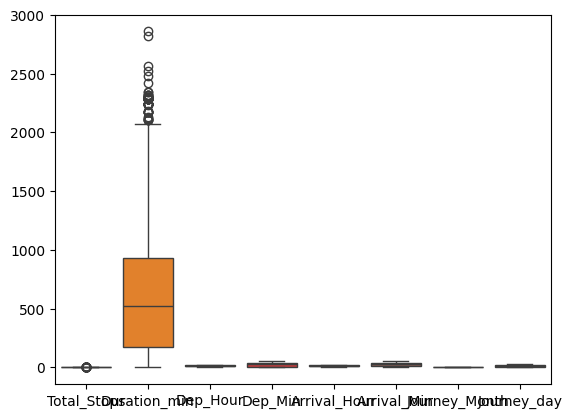

In [36]:
sns.boxplot(num_col)

In [37]:
preprocessing=ColumnTransformer(
    transformers=[
        ("RobustScaler",RobustScaler(),num_col.columns),
        ('OrdinalEncoder',OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1),obj_col.columns)
    ]
)


In [52]:
pipeline=Pipeline(
    steps=[
        ("preprocessing",preprocessing),
        ("model",DecisionTreeRegressor(criterion='absolute_error',max_depth=15,min_samples_leaf=5,min_samples_split=10,max_features="sqrt"))
    ]
)

In [39]:
# grid_search_cv=GridSearchCV(
#     estimator=pipeline,
#     param_grid={
#         "model__max_depth":[None,5,10,15,20],
#         "model__min_samples_split":[2,4,6,8,10],
#         "model__min_samples_leaf":[1,3,5,7,10],
#         "model__criterion":["squared_error","absolute_error"]
#     },
#     cv=3,
#     n_jobs=-1,
#     verbose=1,
#     scoring="neg_mean_absolute_error"
# )

In [40]:
# grid_search_cv.fit(xtrain,ytrain)

In [42]:
# grid_search_cv.score(xtrain,ytrain)

In [43]:
# grid_search_cv.score(xtest,ytest)

In [ ]:
# model_cv=grid_search_cv.best_estimator_

In [ ]:
# grid_search_cv.best_params_

In [ ]:
# model_cv.fit(xtrain,ytrain)

In [ ]:
# model_cv.score(xtrain,ytrain)

In [ ]:
# model_cv.score(xtest,ytest)

In [53]:
pipeline.fit(xtrain,ytrain)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('RobustScaler',
                                                  RobustScaler(),
                                                  Index(['Total_Stops', 'Duration_min', 'Dep_Hour', 'Dep_Min', 'Arrival_Hour',
       'Arrival_Min', 'Journey_Month', 'Journey_day'],
      dtype='object')),
                                                 ('OrdinalEncoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Airline', 'Source', 'Destination'], dtype='object'))])),
                ('model',
                 DecisionTreeRegressor(criterion='absolute_error', max_depth=15,
                                       max_features='sqrt', min_samples_leaf=5,
                                       min_samples_split=10))])

In [54]:
pipeline.score(xtrain,ytrain)

0.791971981589195

In [55]:
pipeline.score(xtest,ytest)

0.7397498977697305

In [44]:
pipeline_RF=Pipeline(
    steps=[
        ("preprocessing",preprocessing),
        ("model",RandomForestRegressor(criterion='absolute_error',max_depth=15,min_samples_leaf=5,min_samples_split=10,n_estimators=200,max_features="sqrt"))
    ]
)

In [45]:
pipeline_RF.fit(xtrain,ytrain)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('RobustScaler',
                                                  RobustScaler(),
                                                  Index(['Total_Stops', 'Duration_min', 'Dep_Hour', 'Dep_Min', 'Arrival_Hour',
       'Arrival_Min', 'Journey_Month', 'Journey_day'],
      dtype='object')),
                                                 ('OrdinalEncoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Airline', 'Source', 'Destination'], dtype='object'))])),
                ('model',
                 RandomForestRegressor(criterion='absolute_error', max_depth=15,
                                       max_features='sqrt', min_samples_leaf=5,
                                       min_samples_split=10,
                                       n_estimators=200))])

In [46]:
pipeline_RF.score(xtrain,ytrain)

0.8000752874276311

In [47]:
pipeline_RF.score(xtest,ytest)

0.783839173232583